## Pytorch Lecture 2: Linear Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
w = 1.0 # a random guess: random value

# model for forward pass
def forward(x):
    return x * w

In [3]:
# Loss function

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

In [4]:
x_data = [1, 2, 3]
y_data = [2, 4, 6]

w = 0.0
	 1 2 0.0 4.0
	 2 4 0.0 16.0
	 3 6 0.0 36.0
MSE =  18.666666666666668
w = 0.0
	 1 2 0.1 3.61
	 2 4 0.2 14.44
	 3 6 0.30000000000000004 32.49
MSE =  16.846666666666668
w = 0.0
	 1 2 0.2 3.24
	 2 4 0.4 12.96
	 3 6 0.6000000000000001 29.160000000000004
MSE =  15.120000000000003
w = 0.0
	 1 2 0.30000000000000004 2.8899999999999997
	 2 4 0.6000000000000001 11.559999999999999
	 3 6 0.9000000000000001 26.009999999999998
MSE =  13.486666666666665
w = 0.0
	 1 2 0.4 2.5600000000000005
	 2 4 0.8 10.240000000000002
	 3 6 1.2000000000000002 23.04
MSE =  11.946666666666667
w = 0.0
	 1 2 0.5 2.25
	 2 4 1.0 9.0
	 3 6 1.5 20.25
MSE =  10.5
w = 1.0
	 1 2 0.6000000000000001 1.9599999999999997
	 2 4 1.2000000000000002 7.839999999999999
	 3 6 1.8000000000000003 17.639999999999993
MSE =  9.146666666666663
w = 1.0
	 1 2 0.7000000000000001 1.6899999999999995
	 2 4 1.4000000000000001 6.759999999999998
	 3 6 2.1 15.209999999999999
MSE =  7.886666666666666
w = 1.0
	 1 2 0.8 1.44
	 2 4 1.6 5.76
	 3 6 2.40

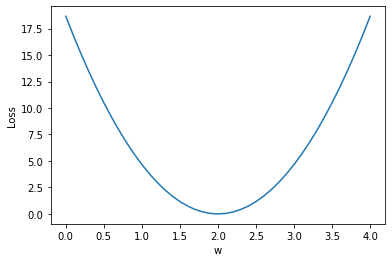

In [5]:
w_list = []
mse_list = []
for w in np.arange(0, 4.1, 0.1):
    print("w =", w.round())
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    
    print("MSE = ", l_sum / 3)
    w_list.append(w)
    mse_list.append(l_sum / 3)
    
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## Pytorch Lecture 3: Gradient Descent

In [6]:
x_data = [1, 2, 3]
y_data = [2, 4, 6]

In [7]:
w = 1.0 # a random guess: random value

# model for forward pass
def forward(x):
    return x * w

In [8]:
# Loss function

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

In [9]:
# compute gradient

def gradient(x, y):   #d_loss/d_w
    return 2*x*(x*w - y)
    

In [10]:
# Before training
print("predict (before training)", 4, forward(4))

# Training Loop

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad   # learning rate x gradient
        print("\tgrad: ", x_val, y_val, grad)
        l = loss(x_val, y_val)
        
    print("progress:", epoch, "w=", w, "loss=", l)
    

# After training

print("predict (after training)", "4 hours", forward(4))

predict (before training) 4 4.0
	grad:  1 2 -2.0
	grad:  2 4 -7.84
	grad:  3 6 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad:  1 2 -1.478624
	grad:  2 4 -5.796206079999999
	grad:  3 6 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1 2 -1.093164466688
	grad:  2 4 -4.285204709416961
	grad:  3 6 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1 2 -0.8081896081960389
	grad:  2 4 -3.1681032641284723
	grad:  3 6 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1 2 -0.59750427561463
	grad:  2 4 -2.3422167604093502
	grad:  3 6 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1 2 -0.44174208101320334
	grad:  2 4 -1.7316289575717576
	grad:  3 6 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1 2 -0.3265852213980338
	grad:  2 4 -1.2802140678802925
	grad:  3 6 -2.650043120512205
progress: 6 w= 1.87927

### Exercise 3-1: Compute gradient


<img src= "excercise_3.png" style=width:600px;height:400px/>

### In pictoral form

<img src= "pictoral_form.jpeg" style=width:950px;height:400px/>

In [11]:
#change in loss wrt change in w1 = x
#change in loss wrt change in w2 = x^2

### Exercise 3-2: Implement gradient

In [12]:
x_data = [1, 2, 3]
y_data = [2, 4, 6]


w1 = 1.0 # a random guess: random value
w2 = 1.0
b = 1

# model for forward pass
def forward(x):
    return (x**2)* w2 + (x*w1) + b

# Loss function

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


# compute gradient

def gradient_w1(x, y):   #d_loss/d_w1
    return x

def gradient_w2(x, y):   #d_loss/d_w2
    return x**2

# Before training
print("predict (before training)", 4, forward(4))

# Training Loop

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        grad_1 = gradient_w1(x_val, y_val)
        grad_2 = gradient_w2(x_val, y_val)
        w1 = w1 - 0.0001 * grad_1   # learning rate x gradient
        w2 = w2 - 0.0001 * grad_2   # learning rate x gradient
        print("\tgrad: ", x_val, y_val, grad)
        l = loss(x_val, y_val)
        
    print("progress:", epoch, "w=", w, "loss=", l)
    

# After training

print("predict (after training)", "4 hours", forward(4))




predict (before training) 4 21.0
	grad:  1 2 -1.6786572132332367e-12
	grad:  2 4 -1.6786572132332367e-12
	grad:  3 6 -1.6786572132332367e-12
progress: 0 w= 1.9999999999999236 loss= 48.79860736000002
	grad:  1 2 -1.6786572132332367e-12
	grad:  2 4 -1.6786572132332367e-12
	grad:  3 6 -1.6786572132332367e-12
progress: 1 w= 1.9999999999999236 loss= 48.59762943999999
	grad:  1 2 -1.6786572132332367e-12
	grad:  2 4 -1.6786572132332367e-12
	grad:  3 6 -1.6786572132332367e-12
progress: 2 w= 1.9999999999999236 loss= 48.397066240000015
	grad:  1 2 -1.6786572132332367e-12
	grad:  2 4 -1.6786572132332367e-12
	grad:  3 6 -1.6786572132332367e-12
progress: 3 w= 1.9999999999999236 loss= 48.19691776000004
	grad:  1 2 -1.6786572132332367e-12
	grad:  2 4 -1.6786572132332367e-12
	grad:  3 6 -1.6786572132332367e-12
progress: 4 w= 1.9999999999999236 loss= 47.99718400000003
	grad:  1 2 -1.6786572132332367e-12
	grad:  2 4 -1.6786572132332367e-12
	grad:  3 6 -1.6786572132332367e-12
progress: 5 w= 1.99999999999

### Exercise 4.1

<img src= "exercise_41.jpg" style=width:600px;height:400px/>

### Solution: Exercise 4.1

<img src= "exercise_41_sol.jpeg" style=width:600px;height:400px/>

### Exercise 4.2

<img src= "exercise_42.jpg" style=width:600px;height:400px/>

### Solution: Exercise 4.2

<img src= "Exercise_42_sol.jpeg" style=width:600px;height:400px/>

### Tutorial code

In [13]:
import torch

In [14]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = torch.tensor([1.0], requires_grad = True) # any random value


# In PyTorch torch.Tensor is the main tensor class. So all tensors are just instances of torch.Tensor.
# When you call torch.Tensor() you will get an empty tensor without any data.
# In contrast torch.tensor is a function which returns a tensor.

x = torch.randn(1, 10)

# model for forward pass
def forward(x):
    return x*w

# Loss function

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

# Before training
print("predict (before training)", 4, forward(4).data[0])

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        l.backward()
        print("\tgrad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data
        
        w.grad.data.zero_()
        
    print("progress:", epoch, "w=", w, "loss=", l)
    

# After training

print("predict (after training)", "4 hours", forward(4))


predict (before training) 4 tensor(4.)
	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progress: 0 w= tensor([1.2607], requires_grad=True) loss= tensor([7.3159], grad_fn=<MulBackward0>)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progress: 1 w= tensor([1.4534], requires_grad=True) loss= tensor([3.9988], grad_fn=<MulBackward0>)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progress: 2 w= tensor([1.5959], requires_grad=True) loss= tensor([2.1857], grad_fn=<MulBackward0>)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progress: 3 w= tensor([1.7012], requires_grad=True) loss= tensor([1.1946], grad_fn=<MulBackward0>)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progress: 4 w= tensor([1.7791], requires_grad=True) loss= tensor([0.6530], grad_fn=<Mul

/home/a/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:145: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554788289/work/c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(


In [15]:
x

tensor([[ 0.2222,  0.8151,  0.4093, -1.3671,  1.5453, -0.5290,  1.3133,  0.4395,
         -0.3063,  2.9765]])

In [16]:
w.data

tensor([2.0000])

<img src= "w_data.jpg" style=width:600px;height:400px/>

## Exercise 4-3: Implement computational graph and backprop using numpy

In [17]:
x_data = np.array([1.0, 2.0, 3.0])
y_data = np.array([2.0, 4.0, 6.0])

w = 1.0

# model for forward pass
def forward(x):
    return np.multiply(x, w)
    
# Loss function

def loss(x, y):
    y_pred = forward(x)
    return np.multiply(np.subtract(y_pred, y), np.subtract(y_pred, y))

# compute gradient

def gradient(x, y):   #d_loss/d_w
    return 2*x*(x*w - y)
    

# Before training
print("predict (before training)", 4, forward(4))

# Training Loop

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad   # learning rate x gradient
        print("\tgrad: ", x_val, y_val, grad)
        l = loss(x_val, y_val)
        
    print("progress:", epoch, "w=", w, "loss=", l)
    

# After training

print("predict (after training)", "4 hours", forward(4))

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1.0 2.0 -0.3265852213980338
	grad:  2

### Exercise 4-4 Compute gradients using computational graph (manually)

<img src= "ex4.4_manual_sol.jpeg" style=width:600px;height:400px/>

# Pytorch lecture 5 (Linear Model)

### Model class in PyTorch way

In [3]:
import torch

x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

In [19]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.linear = torch.nn.Linear(1,1) #Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [20]:
model = Model()

### Construct loss and optimizer

In [21]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

/home/a/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


### Training: forward, loss, backward, step

In [22]:
for epoch in range(500):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 tensor(46.3567)
1 tensor(20.7668)
2 tensor(9.3730)
3 tensor(4.2990)
4 tensor(2.0384)
5 tensor(1.0302)
6 tensor(0.5796)
7 tensor(0.3773)
8 tensor(0.2855)
9 tensor(0.2430)
10 tensor(0.2224)
11 tensor(0.2116)
12 tensor(0.2051)
13 tensor(0.2007)
14 tensor(0.1971)
15 tensor(0.1940)
16 tensor(0.1911)
17 tensor(0.1883)
18 tensor(0.1855)
19 tensor(0.1828)
20 tensor(0.1802)
21 tensor(0.1776)
22 tensor(0.1751)
23 tensor(0.1726)
24 tensor(0.1701)
25 tensor(0.1676)
26 tensor(0.1652)
27 tensor(0.1628)
28 tensor(0.1605)
29 tensor(0.1582)
30 tensor(0.1559)
31 tensor(0.1537)
32 tensor(0.1515)
33 tensor(0.1493)
34 tensor(0.1472)
35 tensor(0.1450)
36 tensor(0.1430)
37 tensor(0.1409)
38 tensor(0.1389)
39 tensor(0.1369)
40 tensor(0.1349)
41 tensor(0.1330)
42 tensor(0.1311)
43 tensor(0.1292)
44 tensor(0.1273)
45 tensor(0.1255)
46 tensor(0.1237)
47 tensor(0.1219)
48 tensor(0.1202)
49 tensor(0.1184)
50 tensor(0.1167)
51 tensor(0.1151)
52 tensor(0.1134)
53 tensor(0.1118)
54 tensor(0.1102)
55 tensor(0.1086)


### Testing model

In [23]:
hour_var = torch.tensor([[4.0]])

In [24]:
print("predict (after training)", 4, model.forward(hour_var).data)

predict (after training) 4 tensor([[7.9848]])


# Pytorch lecture 6 (Logistic Regression)

In [25]:
import torch.nn.functional as F

In [26]:
x_data = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = torch.tensor([[0.], [0.], [1.], [1.]])

In [27]:
class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [28]:
model = Model()

In [29]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

/home/a/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [30]:
for epoch in range(500):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/a/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [31]:
hour_var = torch.tensor([[1.0]])
print("predict (after training)", 1.0, model.forward(hour_var).data[0][0] > 0.5)

predict (after training) 1.0 tensor(False)


In [32]:
hour_var = torch.tensor([[7.0]])
print("predict (after training)", 7.0, model.forward(hour_var).data[0][0] > 0.5)

predict (after training) 7.0 tensor(True)


# Pytorch lecture 7 (Wide & Deep Regression)

In [33]:
import pandas as pd

In [34]:
xy = np.loadtxt('/home/a/Documents/Pytorch/data_diabetes.csv', delimiter = ',', dtype=np.float32)

In [35]:
x_data = torch.from_numpy(xy[:, 0:-1])
y_data = torch.from_numpy(xy[:, [-1]])

In [36]:
print(x_data.data.shape)
print(y_data.data.shape)

torch.Size([759, 8])
torch.Size([759, 1])


In [37]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 1)
        
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

In [38]:
model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [39]:
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Pytorch lecture 8 (Data Loader)

In [40]:
from torch.utils.data import Dataset, DataLoader

In [41]:
class DiabetesDataset(Dataset):
    
    def __init__(self):  
        xy = np.loadtxt('/home/a/Documents/Pytorch/data_diabetes.csv', delimiter = ',',
                       dtype = np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    
    
dataset = DiabetesDataset()
train_loader = DataLoader(dataset= dataset, 
                         batch_size= 32,
                         shuffle=True,
                         num_workers=2)

# Pytorch lecture 9 (Softmax Classifier)

### cross entropy loss calculation using numpy (understanding fundamentals)

In [42]:
import numpy as np

In [43]:
y = np.array([1, 0, 0])
y_pred1 = np.array([0.7, 0.2, 0.1])
y_pred2 = np.array([0.1, 0.3, 0.6])

In [44]:
print("loss 1 = ", np.sum(-y * np.log(y_pred1)))
print("loss 2 = ", np.sum(-y * np.log(y_pred2)))  # cross entropy function is sum of product of -y and log y. D(y^, Y) = -YlogY^

loss 1 =  0.35667494393873245
loss 2 =  2.3025850929940455


### cross entropy in pytorch

### example 1

In [45]:
from torch import nn
loss = nn.CrossEntropyLoss()

y = torch.tensor([0])   # input is class, not one-hot
y_pred1 = torch.tensor([[2.0, 1.0, 0.1]])
y_pred2 = torch.tensor([[0.5, 2.0, 0.3]])

In [46]:
l1 = loss(y_pred1, y)
l2 = loss(y_pred2, y)

print("PyTorch Loss1 = ", l1.data)
print("PyTorch Loss2 = ", l2.data)

# the output of linear model is in the form of logits.
# softmax fucntion calculate probabilites of logits if applied to linear model.
# for cross entropy loss calculation, no need to apply softmax function as it is built in feature of crossentropyloss in pytorch.
# we need to provide logit values only
# we don't need to provide one-hot labels but class labels

PyTorch Loss1 =  tensor(0.4170)
PyTorch Loss2 =  tensor(1.8406)


### example 2

In [47]:
loss = nn.CrossEntropyLoss()

y = torch.tensor([2, 0, 1])   # input is class, not one-hot
y_pred1 = torch.tensor([[0.1, 0.2, 0.9],
                        [1.1, 0.1, 0.2],
                        [0.2, 2.1, 0.1]])
y_pred2 = torch.tensor([[0.8, 0.2, 0.3],
                        [0.2, 0.3, 0.5],
                        [0.2, 0.2, 0.5]])

In [48]:
l1 = loss(y_pred1, y)
l2 = loss(y_pred2, y)

print("Batch Loss1 = ", l1.data)
print("\nBatch Loss2 = ", l2.data)

Batch Loss1 =  tensor(0.4966)

Batch Loss2 =  tensor(1.2389)


### softmax & nll loss (log softmax) on mnist data

In [4]:
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

0
1
GeForce GTX 1650 Ti with Max-Q Design


In [50]:
import torchvision
from torchvision import datasets, transforms
from torch.utils import data
from torch import cuda, nn, optim
import time

In [51]:
# MNIST Dataset
batch_size = 64

device = 'cuda' if cuda.is_available() else 'cpu'
print(f'Training MNIST Model on {device}\n{"=" * 44}')  

# The f means Formatted string literals and
# it's new in Python 3.6. A formatted string literal or f-string is a string literal that is prefixed with 'f' 
# or 'F'. These strings may contain replacement fields, which are expressions delimited by curly braces {}.
# While other string literals always have a constant value, 
# formatted strings are really expressions evaluated at run time.


train_dataset = datasets.MNIST(root='./mnistt/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnistt/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Training MNIST Model on cpu


In [52]:
torch.cuda.is_available()

False

In [53]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.l1 = nn.Linear(784, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)

In [54]:
model = net()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [55]:
model.parameters

<bound method Module.parameters of net(
  (l1): Linear(in_features=784, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=320, bias=True)
  (l3): Linear(in_features=320, out_features=240, bias=True)
  (l4): Linear(in_features=240, out_features=120, bias=True)
  (l5): Linear(in_features=120, out_features=10, bias=True)
)>

In [56]:
def train(epoch):

# the model.train() sets the modules in the network in training mode.
# It tells our model that we are currently in the training phase 
# so the model keeps some layers, like dropout, batch-normalization 
# which behaves differently depends on the current phase, active.
# whereas the model.eval() does the opposite.
# Therefore, once the model.eval() has been called then, our model deactivate such layers 
# so that the model outputs its inference as is expected.

    model.train()   
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    

In [57]:
def test():
    
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        # sum up batch loss
        test_loss += criterion(output, target).item()
        # get the index of the max
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(f'===========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)')

In [58]:
if __name__ == '__main__':
    since = time.time()
    for epoch in range(1, 10):
        epoch_start = time.time()
        train(epoch)
        m, s = divmod(time.time() - epoch_start, 60)
        print(f'Training time: {m:.0f}m {s:.0f}s')
        test()
        m, s = divmod(time.time() - epoch_start, 60)
        print(f'Testing time: {m:.0f}m {s:.0f}s')

    m, s = divmod(time.time() - since, 60)
    print(f'Total Time: {m:.0f}m {s:.0f}s\nModel was trained on {device}!')


Train Epoch: 1 | Batch Status: 0/60000 (0%) | Loss: 2.310788
Train Epoch: 1 | Batch Status: 640/60000 (1%) | Loss: 2.306849
Train Epoch: 1 | Batch Status: 1280/60000 (2%) | Loss: 2.301533
Train Epoch: 1 | Batch Status: 1920/60000 (3%) | Loss: 2.304139
Train Epoch: 1 | Batch Status: 2560/60000 (4%) | Loss: 2.304168
Train Epoch: 1 | Batch Status: 3200/60000 (5%) | Loss: 2.298782
Train Epoch: 1 | Batch Status: 3840/60000 (6%) | Loss: 2.301463
Train Epoch: 1 | Batch Status: 4480/60000 (7%) | Loss: 2.300391
Train Epoch: 1 | Batch Status: 5120/60000 (9%) | Loss: 2.296320
Train Epoch: 1 | Batch Status: 5760/60000 (10%) | Loss: 2.297339
Train Epoch: 1 | Batch Status: 6400/60000 (11%) | Loss: 2.297946
Train Epoch: 1 | Batch Status: 7040/60000 (12%) | Loss: 2.297056
Train Epoch: 1 | Batch Status: 7680/60000 (13%) | Loss: 2.297132
Train Epoch: 1 | Batch Status: 8320/60000 (14%) | Loss: 2.303136
Train Epoch: 1 | Batch Status: 8960/60000 (15%) | Loss: 2.293896
Train Epoch: 1 | Batch Status: 9600/60

Train Epoch: 2 | Batch Status: 19840/60000 (33%) | Loss: 0.470087
Train Epoch: 2 | Batch Status: 20480/60000 (34%) | Loss: 0.594828
Train Epoch: 2 | Batch Status: 21120/60000 (35%) | Loss: 0.494504
Train Epoch: 2 | Batch Status: 21760/60000 (36%) | Loss: 0.624721
Train Epoch: 2 | Batch Status: 22400/60000 (37%) | Loss: 0.490421
Train Epoch: 2 | Batch Status: 23040/60000 (38%) | Loss: 0.769661
Train Epoch: 2 | Batch Status: 23680/60000 (39%) | Loss: 0.460985
Train Epoch: 2 | Batch Status: 24320/60000 (41%) | Loss: 0.780533
Train Epoch: 2 | Batch Status: 24960/60000 (42%) | Loss: 0.727740
Train Epoch: 2 | Batch Status: 25600/60000 (43%) | Loss: 0.517024
Train Epoch: 2 | Batch Status: 26240/60000 (44%) | Loss: 0.544747
Train Epoch: 2 | Batch Status: 26880/60000 (45%) | Loss: 0.532422
Train Epoch: 2 | Batch Status: 27520/60000 (46%) | Loss: 0.626358
Train Epoch: 2 | Batch Status: 28160/60000 (47%) | Loss: 0.451439
Train Epoch: 2 | Batch Status: 28800/60000 (48%) | Loss: 0.598500
Train Epoc

Train Epoch: 3 | Batch Status: 38400/60000 (64%) | Loss: 0.258070
Train Epoch: 3 | Batch Status: 39040/60000 (65%) | Loss: 0.277935
Train Epoch: 3 | Batch Status: 39680/60000 (66%) | Loss: 0.099071
Train Epoch: 3 | Batch Status: 40320/60000 (67%) | Loss: 0.276987
Train Epoch: 3 | Batch Status: 40960/60000 (68%) | Loss: 0.269845
Train Epoch: 3 | Batch Status: 41600/60000 (69%) | Loss: 0.472186
Train Epoch: 3 | Batch Status: 42240/60000 (70%) | Loss: 0.293287
Train Epoch: 3 | Batch Status: 42880/60000 (71%) | Loss: 0.366023
Train Epoch: 3 | Batch Status: 43520/60000 (72%) | Loss: 0.300302
Train Epoch: 3 | Batch Status: 44160/60000 (74%) | Loss: 0.228050
Train Epoch: 3 | Batch Status: 44800/60000 (75%) | Loss: 0.298473
Train Epoch: 3 | Batch Status: 45440/60000 (76%) | Loss: 0.183068
Train Epoch: 3 | Batch Status: 46080/60000 (77%) | Loss: 0.175977
Train Epoch: 3 | Batch Status: 46720/60000 (78%) | Loss: 0.287106
Train Epoch: 3 | Batch Status: 47360/60000 (79%) | Loss: 0.351118
Train Epoc

Train Epoch: 4 | Batch Status: 58240/60000 (97%) | Loss: 0.082243
Train Epoch: 4 | Batch Status: 58880/60000 (98%) | Loss: 0.307689
Train Epoch: 4 | Batch Status: 59520/60000 (99%) | Loss: 0.407953
Training time: 0m 6s
Test set: Average loss: 0.0033, Accuracy: 9401/10000 (94%)
Testing time: 0m 7s
Train Epoch: 5 | Batch Status: 0/60000 (0%) | Loss: 0.171137
Train Epoch: 5 | Batch Status: 640/60000 (1%) | Loss: 0.200580
Train Epoch: 5 | Batch Status: 1280/60000 (2%) | Loss: 0.183387
Train Epoch: 5 | Batch Status: 1920/60000 (3%) | Loss: 0.103449
Train Epoch: 5 | Batch Status: 2560/60000 (4%) | Loss: 0.149939
Train Epoch: 5 | Batch Status: 3200/60000 (5%) | Loss: 0.150600
Train Epoch: 5 | Batch Status: 3840/60000 (6%) | Loss: 0.216037
Train Epoch: 5 | Batch Status: 4480/60000 (7%) | Loss: 0.195243
Train Epoch: 5 | Batch Status: 5120/60000 (9%) | Loss: 0.315436
Train Epoch: 5 | Batch Status: 5760/60000 (10%) | Loss: 0.133608
Train Epoch: 5 | Batch Status: 6400/60000 (11%) | Loss: 0.178145


Train Epoch: 6 | Batch Status: 16000/60000 (27%) | Loss: 0.100422
Train Epoch: 6 | Batch Status: 16640/60000 (28%) | Loss: 0.154272
Train Epoch: 6 | Batch Status: 17280/60000 (29%) | Loss: 0.130436
Train Epoch: 6 | Batch Status: 17920/60000 (30%) | Loss: 0.099936
Train Epoch: 6 | Batch Status: 18560/60000 (31%) | Loss: 0.076543
Train Epoch: 6 | Batch Status: 19200/60000 (32%) | Loss: 0.142934
Train Epoch: 6 | Batch Status: 19840/60000 (33%) | Loss: 0.169804
Train Epoch: 6 | Batch Status: 20480/60000 (34%) | Loss: 0.102548
Train Epoch: 6 | Batch Status: 21120/60000 (35%) | Loss: 0.298933
Train Epoch: 6 | Batch Status: 21760/60000 (36%) | Loss: 0.132138
Train Epoch: 6 | Batch Status: 22400/60000 (37%) | Loss: 0.286423
Train Epoch: 6 | Batch Status: 23040/60000 (38%) | Loss: 0.444421
Train Epoch: 6 | Batch Status: 23680/60000 (39%) | Loss: 0.267681
Train Epoch: 6 | Batch Status: 24320/60000 (41%) | Loss: 0.134622
Train Epoch: 6 | Batch Status: 24960/60000 (42%) | Loss: 0.296805
Train Epoc

Train Epoch: 7 | Batch Status: 35840/60000 (60%) | Loss: 0.138338
Train Epoch: 7 | Batch Status: 36480/60000 (61%) | Loss: 0.196670
Train Epoch: 7 | Batch Status: 37120/60000 (62%) | Loss: 0.154664
Train Epoch: 7 | Batch Status: 37760/60000 (63%) | Loss: 0.095878
Train Epoch: 7 | Batch Status: 38400/60000 (64%) | Loss: 0.204984
Train Epoch: 7 | Batch Status: 39040/60000 (65%) | Loss: 0.116927
Train Epoch: 7 | Batch Status: 39680/60000 (66%) | Loss: 0.031301
Train Epoch: 7 | Batch Status: 40320/60000 (67%) | Loss: 0.236929
Train Epoch: 7 | Batch Status: 40960/60000 (68%) | Loss: 0.076864
Train Epoch: 7 | Batch Status: 41600/60000 (69%) | Loss: 0.104300
Train Epoch: 7 | Batch Status: 42240/60000 (70%) | Loss: 0.124216
Train Epoch: 7 | Batch Status: 42880/60000 (71%) | Loss: 0.156327
Train Epoch: 7 | Batch Status: 43520/60000 (72%) | Loss: 0.130405
Train Epoch: 7 | Batch Status: 44160/60000 (74%) | Loss: 0.072816
Train Epoch: 7 | Batch Status: 44800/60000 (75%) | Loss: 0.216302
Train Epoc

Train Epoch: 8 | Batch Status: 55040/60000 (92%) | Loss: 0.126224
Train Epoch: 8 | Batch Status: 55680/60000 (93%) | Loss: 0.061800
Train Epoch: 8 | Batch Status: 56320/60000 (94%) | Loss: 0.112623
Train Epoch: 8 | Batch Status: 56960/60000 (95%) | Loss: 0.043430
Train Epoch: 8 | Batch Status: 57600/60000 (96%) | Loss: 0.072011
Train Epoch: 8 | Batch Status: 58240/60000 (97%) | Loss: 0.176626
Train Epoch: 8 | Batch Status: 58880/60000 (98%) | Loss: 0.187947
Train Epoch: 8 | Batch Status: 59520/60000 (99%) | Loss: 0.155622
Training time: 0m 7s
Test set: Average loss: 0.0021, Accuracy: 9610/10000 (96%)
Testing time: 0m 8s
Train Epoch: 9 | Batch Status: 0/60000 (0%) | Loss: 0.158322
Train Epoch: 9 | Batch Status: 640/60000 (1%) | Loss: 0.030324
Train Epoch: 9 | Batch Status: 1280/60000 (2%) | Loss: 0.025376
Train Epoch: 9 | Batch Status: 1920/60000 (3%) | Loss: 0.146930
Train Epoch: 9 | Batch Status: 2560/60000 (4%) | Loss: 0.058884
Train Epoch: 9 | Batch Status: 3200/60000 (5%) | Loss: 0

In [ ]:
# conda install pytorch torchvision cudatoolkit=11.0 -c pytorch

# CNN

<img src= "cnn1.jpg" style=width:600px;height:400px/>

<img src= "cnn2.jpg" style=width:600px;height:400px/>

<img src= "cnn3.jpg" style=width:600px;height:400px/>

<img src= "cnn4.jpg" style=width:650px;height:400px/>

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  # inchannel = 1 = the number of color channels in the input image.
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(20,10)
        
    
    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)
        x = self.fc(x)
        return F.log_softmax(x)
        